In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data = heart_data.drop(columns="DEATH_EVENT")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [5]:
features=data.columns
features

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [7]:
heart_data["DEATH_EVENT"].unique()

array([1, 0], dtype=int64)

In [8]:
target=heart_data["DEATH_EVENT"]


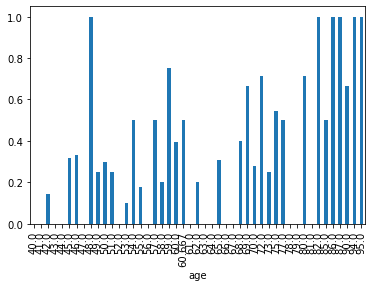

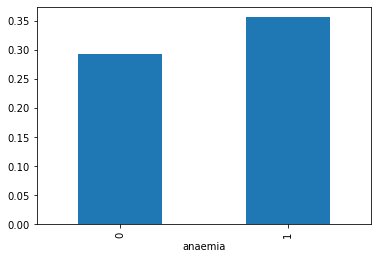

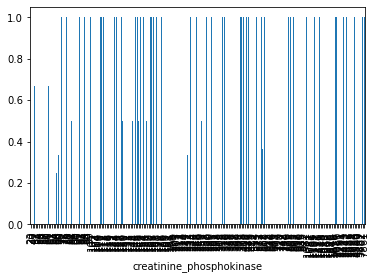

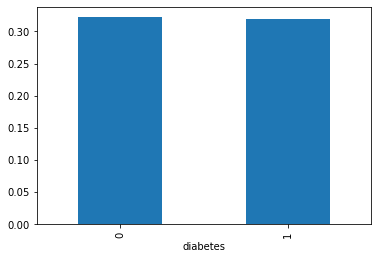

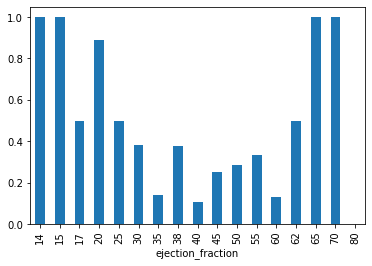

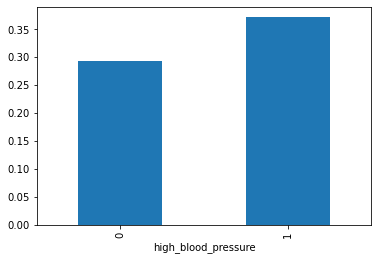

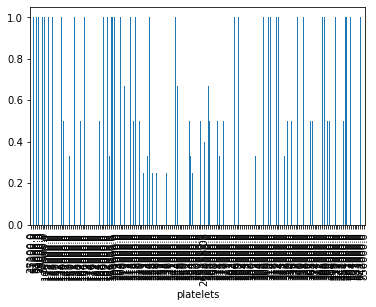

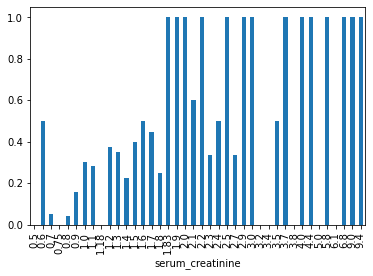

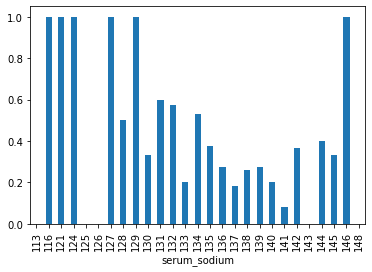

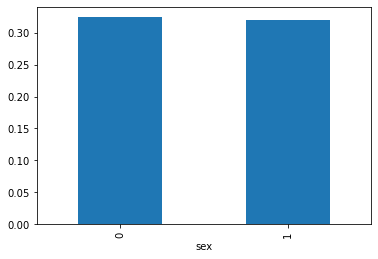

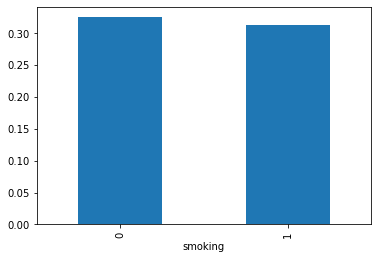

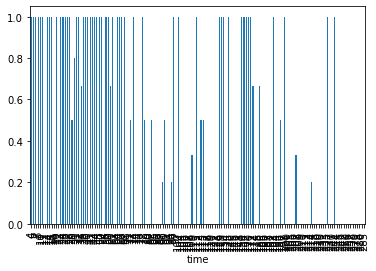

In [9]:
for feature in features:
    heart_data.groupby(feature)["DEATH_EVENT"].mean().plot.bar()
    plt.show()

In [10]:
## From the above observation 
# SEX AND DIABETES HAS NO EFFECT ON DEATH_EVENT hence drop the columns
features = data.drop(columns=['sex','diabetes','smoking'],axis=1).columns
features

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'time'],
      dtype='object')

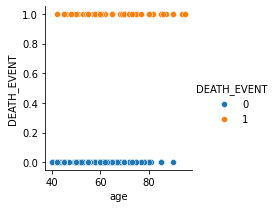

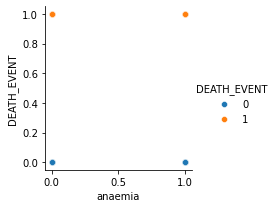

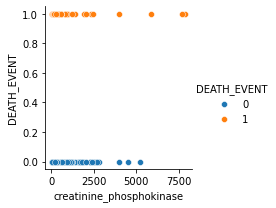

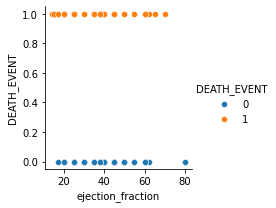

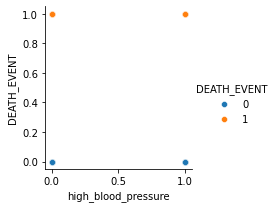

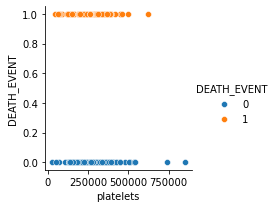

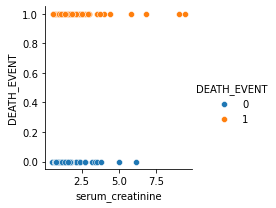

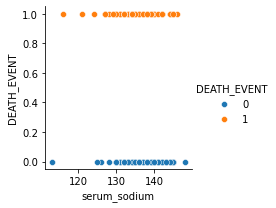

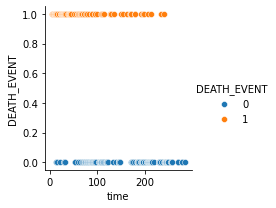

In [11]:
for feature in features:
    sns.FacetGrid(heart_data,hue="DEATH_EVENT").map(sns.scatterplot,feature,'DEATH_EVENT').add_legend()
    plt.show()
    

C:\Users\KARTIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

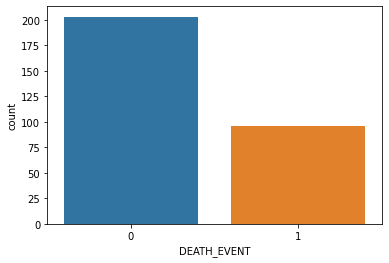

In [12]:
sns.countplot(target)

In [13]:
data_corr=heart_data.corr()

<AxesSubplot:>

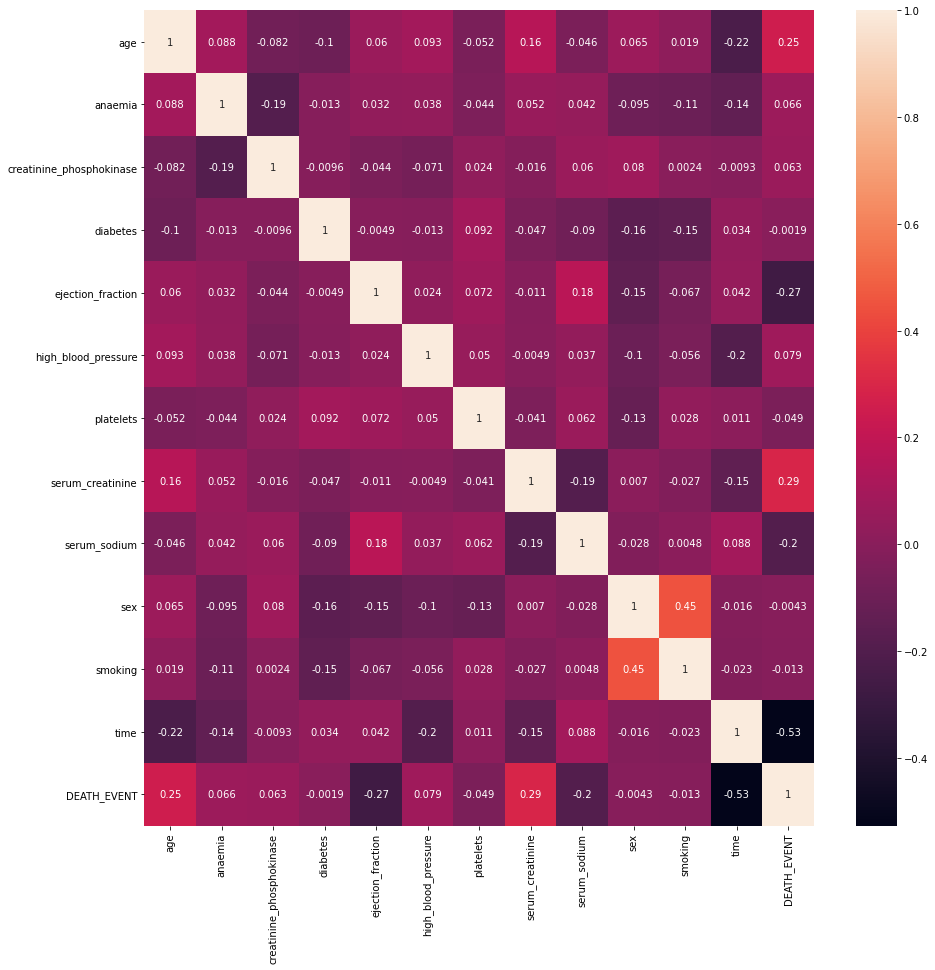

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data_corr,annot=True)

<AxesSubplot:xlabel='DEATH_EVENT'>

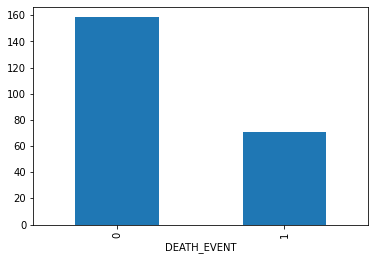

In [15]:
heart_data.groupby('DEATH_EVENT')['time'].mean().plot.bar()

<AxesSubplot:xlabel='DEATH_EVENT'>

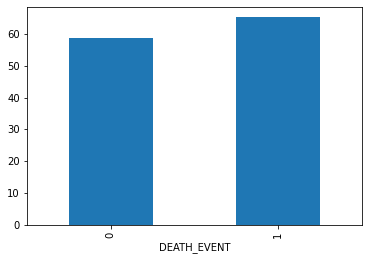

In [16]:
heart_data.groupby('DEATH_EVENT')['age'].mean().plot(kind='bar')

In [112]:
features

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'time'],
      dtype='object')

In [113]:
X=heart_data[features]
X.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time
0,75.0,0,582,20,1,265000.00,1.9,130,4
1,55.0,0,7861,38,0,263358.03,1.1,136,6
2,65.0,0,146,20,0,162000.00,1.3,129,7
3,50.0,1,111,20,0,210000.00,1.9,137,7
4,65.0,1,160,20,0,327000.00,2.7,116,8


In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X,target,test_size=0.25)

In [115]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

<ipython-input-115-7a9fa1e39cfb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier()

In [116]:
predicted=model.predict(X_test)

In [117]:
accuracy_score(Y_test,predicted)

0.84

In [118]:
scores=cross_val_score(estimator=model,X=X,y=target)

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector 

In [119]:
scores.mean()

0.6889830508474576

In [122]:
model=RandomForestClassifier()
param={'criterion': ["gini", "entropy", "log_loss"],
       'max_depth': [1,2,3,6,9,12,24,48,50,100],
       'min_samples_split' : [2,4,6,8],
       'min_samples_leaf' : [1,2,3,6,9],
       'max_features' : ['sqrt','log2']
    }
grid = GridSearchCV(estimator=model,param_grid=param,n_jobs=-4)

In [123]:
grid.fit(X_train,Y_train)

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80343434 0.7989899  0.81252525 ...        nan        nan        nan]
  warnings.warn(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-4,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 6, 9, 12, 24, 48, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 6, 9],
                         'min_samples_split': [2, 4, 6, 8]})

In [125]:
predicted=grid.predict(X_test)

accuracy_score(Y_test,predicted)

0.84

In [140]:
model=LogisticRegression()
param={
    'penalty' : ['l1','l2','elasticnet'],
    'C' : [1,2,3,6,10,25,50,100,200]
}

model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [141]:
grid= GridSearchCV(estimator=model,param_grid=param,n_jobs=4)
grid.fit(X_train,Y_train)

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.8259596         nan        nan 0.8259596         nan
        nan 0.82151515        nan        nan 0.82151515        nan
        nan 0.82151515        nan        nan 0.83484848        nan
        nan 0.82151515        nan        nan 0.82151515        nan
        nan 0.82151515        nan]
  warnings.warn(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 2, 3, 6, 10, 25, 50, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [144]:
predicted=grid.predict(X_test)
accuracy_score(Y_test,predicted)

0.8

In [142]:
model.fit(X_train,Y_train)

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [143]:
predicted=model.predict(X_test)

In [28]:
accuracy_score(Y_test,predicted)

0.8

In [29]:
scores=cross_val_score(model,X=X,y=target)
scores.mean()

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.7822598870056497

In [64]:
len(X.columns)

9

In [65]:
target=np.array(target).reshape(-1,1)

In [66]:
fun=OneHotEncoder()

In [67]:
Y=fun.fit_transform(target).toarray()

In [68]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_test.shape

(60, 9)

In [92]:
model=Sequential()

In [96]:
model.add(Dense(100,input_dim=9,activation='sigmoid'))
model.add(Dense(2,input_dim=100,activation='softmax'))

In [97]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [107]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6736
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.6736
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6736
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6736
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6736
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6736
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6324 - accuracy: 0.6736
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6736
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6736
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6736
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6736
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6736
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6736
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6736
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6736
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6736
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6736
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6736
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6736
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6736
Epoch 94/100
8/8 [===============

In [108]:
result=model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6136 - accuracy: 0.7000


In [109]:
y=model.predict(X_test)

2/2 [==============================] - 0s 0s/step
